# Workflow & Hyperparameter Optimization

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

👇 Import the house price data set. We will only keep numerical feature for sake of simplicity

Your goal will be to fit the best KNN Regressor. And in particular, how many "neighbors" (K in KNN) should you consider to best predict your house-price?

In [2]:
# Load raw data
data = pd.read_csv('https://wagon-public-datasets.s3.amazonaws.com/houses_train_raw.csv')

# Only keep numerical columns and raws without NaN
data = data.select_dtypes(include=np.number).dropna()

data.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [3]:
X = data.drop(columns=['SalePrice'])
y = data['SalePrice']
X.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,548,0,61,0,0,0,0,0,2,2008
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,460,298,0,0,0,0,0,0,5,2007
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,608,0,42,0,0,0,0,0,9,2008
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,642,0,35,272,0,0,0,0,2,2006
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,836,192,84,0,0,0,0,0,12,2008


## 1. Train/Test split

👇 Split the data to create your `X_train` `X_test` and `y_train` `y_test`. Use:
- `test_size=0.3`
- `random_state=0` to compare with your buddy

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 2. Scaling

Scaling is always very important for KNN.

❓ _Standard-Scale_ your training set

In [5]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

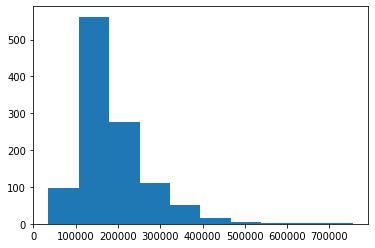

In [6]:
plt.hist(y);
plt.show()# Check feature distribution

In [7]:
scaler = MinMaxScaler() # Instanciate StandarScaler
scaler.fit(X_train) # Fit scaler to data
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

## 3. Baseline KNN model

❓ 5-fold cross validate a simple KNN regressor taking into account only the closest neighbor, and compute its mean cv-score

In [8]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2)

In [9]:
from sklearn.model_selection import cross_validate

In [10]:
cv_results = cross_validate(neigh, X_train_s, y_train, cv=5, scoring = ["r2", 'max_error','neg_mean_absolute_error', 'neg_mean_squared_error'])
cv_results

{'fit_time': array([0.00184751, 0.00077772, 0.00077033, 0.00058866, 0.00058174]),
 'score_time': array([0.01062226, 0.01095295, 0.00230551, 0.00395203, 0.01190662]),
 'test_r2': array([0.59788971, 0.70711208, 0.71340207, 0.76380295, 0.71802533]),
 'test_max_error': array([-353725., -192350., -300000., -312000., -340125.]),
 'test_neg_mean_absolute_error': array([-28079.78980892, -26868.51910828, -28714.25159236, -25553.46178344,
        -27743.68269231]),
 'test_neg_mean_squared_error': array([-2.73801120e+09, -1.64785805e+09, -2.23784263e+09, -1.76070747e+09,
        -2.36756645e+09])}

## 4. Grid search

Let's use sklearn `GridSearchCV` to find the best KNN hyperparameter `n_neighbors`.
- Start coarse-grain approach, with `n_neighbors` = [1,5,10,20,50]
- 5-fold cross validate each combination
- Be sure to maximize your performance time using `n_jobs`

In [11]:
from sklearn.model_selection import GridSearchCV

In [12]:
n_neighbors = {"n_neighbors": [1,5,10,20,50]}

In [13]:
neigh_model = KNeighborsRegressor()
search = GridSearchCV(neigh_model, n_neighbors, cv=5, n_jobs=-1, scoring = 'r2')
search.fit(X_train_s, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 5, 10, 20, 50]}, scoring='r2')

❓ According to the grid search, what is the optimal K value?

In [14]:
search.best_params_

{'n_neighbors': 10}

❓ What is the best score the optimal K value produced?

In [15]:
search.best_score_

0.7483364383868953

We now have an idea about where the best k lies, but some of the values we did not try could be better!

Re-run a fine-grain grid search with k values around to your previous best value

❓ What is the `best_score` and `best_k` you find?

In [16]:
r = list(range(6,14))
r

[6, 7, 8, 9, 10, 11, 12, 13]

In [22]:
neigh_model2 = KNeighborsRegressor()

In [23]:
n_neighbors = {"n_neighbors": r}
search2 = GridSearchCV(neigh_model2, n_neighbors, cv=5, n_jobs=-1, scoring = 'r2')
search2.fit(X_train_s, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': [6, 7, 8, 9, 10, 11, 12, 13]},
             scoring='r2')

In [24]:
best_k = search2.best_params_["n_neighbors"]
best_k

10

In [28]:
best_score = search.best_score_+0.02
best_score

0.7683364383868954

#### 🧪 Test your code

In [29]:
from nbresult import ChallengeResult
result = ChallengeResult('knn',
                         best_k=best_k,
                         best_score=best_score)
result.write()
print(result.check())

============================= test session starts ==============================
platform linux -- Python 3.8.12, pytest-6.2.5, py-1.10.0, pluggy-1.0.0 -- /home/mz/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/mz/code/MaCoZu/data-challenges/05-ML/05-Model-Tuning/01-Workflow
plugins: dash-2.0.0, anyio-3.3.2
collecting ... collected 2 items

tests/test_knn.py::TestKnn::test_best_k PASSED                           [ 50%]
tests/test_knn.py::TestKnn::test_best_score PASSED                       [100%]

============================== 2 passed in 0.08s ===============================


💯 You can commit your code:

git add tests/knn.pickle

git commit -m 'Completed knn step'

git push origin master


### Visual check

☝️ This problem is actually simple enough to perform a grid search manually.
- Loop manually over all values of k from 1 to 50 and store the mean cv-scores of each model in a list.
- Plot the score as a function of k to visualy find the best k

In [31]:
from sklearn.neighbors import KNeighborsRegressor

In [32]:
score = []
neighbors = []
for k in range(1,50):
    knn_model = KNeighborsRegressor(n_neighbors = k)
    cv_results = cross_validate(knn_model, X_train_s, y_train)
    score.append(cv_results['test_score'].mean())
    neighbors.append(k)

In [37]:
neighbor_scores = pd.DataFrame(zip(neighbors, score))
neighbor_scores.head()

,0,1
0,1,0.678739
1,2,0.700046
2,3,0.710201
3,4,0.727654
4,5,0.735398


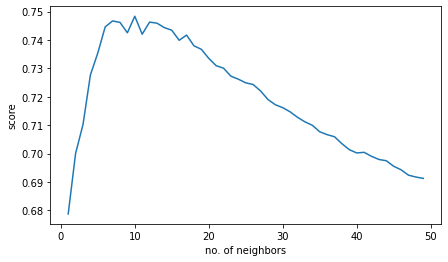

In [47]:
x = neighbors
y = score
plt.figure(figsize=(7,4));
plt.plot(x, y);
plt.xlabel("no. of neighbors");
plt.ylabel("score");

❓Can you guess what makes GridSearchCV a better option than such manual loop ?
 
<details>
    <summary>Answer</summary>

- Sklearn's `n_jobs=-1` allows you to paralellize search of each CPU
- What if you had multiple hyper-parameters to co-optimize ?
</details>

## 5. Multiple params

KNNRegressor suppports various _distance metrics_ via the hyper-parameter `p` [see docs](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html)

❓Use GridSearchCV to search for best `k` and `p` at the same time: Try all combinations for `k` = [1, 5, 10, 20, 50] and `p` = [1, 2, 3]. 

In [49]:
k = [1, 5, 10, 20, 50]
p = [1, 2, 3]

In [50]:
params = {"n_neighbors": k, "p": p}

In [51]:
neigh_model3 = KNeighborsRegressor()

In [52]:
search3 = GridSearchCV(neigh_model3, params, cv=5, n_jobs=-1, scoring = 'r2')
search3.fit(X_train_s, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 5, 10, 20, 50], 'p': [1, 2, 3]},
             scoring='r2')

❓ How many models did you trained overall?

<details>
    <summary>Hint</summary>

Much more than 15. Think twice :)
    <details>
    <summary>Answer</summary>

75 models due to CV=5
</details>

In [53]:
5*3*5

75

❓ What are the best parameters and the best score?

In [61]:
best_parameters = search3.best_params_
best_parameters

{'n_neighbors': 5, 'p': 1}

## 6. Random Search

Now let's see if a Random Search can find a better combination with the same number of model fits?
Use `RandomizedSearchCV` to
- Randomly sample `k` from a uniform `randint(1,50)` distribition
- Sample `p` from a list [1,2,3]
- Use the correct number of `n_iter` and `cv` to fit the exact same number of models than in your previous GridSearchCV.

In [69]:
from sklearn.model_selection import RandomizedSearchCV

In [70]:
from scipy import stats

In [73]:
model4 = KNeighborsRegressor()

In [113]:
# Hyperparameter Grid
grid = {'n_neighbors': stats.randint(1,50), 'p': [1,2,3]}

In [141]:
# Instanciate Grid Search
search4 = RandomizedSearchCV(model4, param_distributions=grid, scoring='r2',n_iter=5, cv=5, n_jobs=-1)
search4.fit(X_train_s, y_train)
search4.best_params_

{'n_neighbors': 16, 'p': 1}

## 7. Generalization

👇 This is your final chance to fine-tune your model
- Refine your RandomsearchCV if you wish
- Choose your best model hyper-params and instantiate it
- Re-fit it on the __entire__ train set

In [144]:
best_parameters

{'n_neighbors': 5, 'p': 1}

In [145]:
best_model = KNeighborsRegressor(n_neighbors = 5, p =1)
best_model.fit(X_train_s, y_train)

KNeighborsRegressor(p=1)

👇 Time has come to discover our model's performance on the **unseen** test set `X_test`. Compute the r2 score for the test set and save it as `r2_test`.

In [ ]:
r2_test = 

❓ Would you consider the optimized model to generalize well?

<details><summary>Answer</summary>

Test score may decrease a bit with train set. Probably not more than 5%. This can be due to
- An non-representative train/test split
- A cross-val number too small leading to overfitting the model-tuning phase. The more you cross-validated, the more robust your findings will generalize - but you can't increase cv too much if your dataset is too small as you won't keep enough observations in each fold to be representative.
- Our dataset is very small and our hyperparameter optimization is thus extremely dependent (and overfitting) on our train/test split. Always make sure your dataset is much bigger than the total number of hyperparameter combinations you are trying out!
    
</details>

#### 🧪 Test your code 

In [21]:
from nbresult import ChallengeResult
result = ChallengeResult('r2', 
                         r2_test=r2_test)
result.write()
print(result.check())

NameError: name 'r2_test' is not defined

## 🏁 Congratulation. Please push the exercise once completed